<a href="https://colab.research.google.com/github/shalakagangadhare/Bitcoin-market-vs-traders/blob/main/Bitcoin_market_vs_trader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##🧠 Bitcoin Market Sentiment vs Trader Performance Analysis

🎯 Objective

This project investigates how market sentiment (classified as "Fear" or "Greed") influences trader behavior and performance. By merging sentiment data with historical trading records, we aim to uncover patterns that could inform better trading strategies.

📁 Datasets Used
Bitcoin Market Sentiment Dataset

Columns:
timestamp,value ,date, Classification (values: "Fear" or "Greed")

Hyperliquid Trader Dataset

Columns include:
Account, Coin, Execution Price, Size Tokens, Size USD, Side,
       Timestamp IST, Start Position, Direction, Closed PnL,
       Transaction Hash, Order ID, Crossed, Fee, Trade ID,
       Timestamp, date.

#🔍 Key Goals
Analyze the distribution of trades under "Fear" vs "Greed".

Compare average PnL, win rate by sentiment.

Find correlations between performance metrics and sentiment.

Detect patterns that may suggest trading risks or opportunities based on emotional market states.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_sentiment = '/content/fear_greed_index.csv'
df = pd.read_csv(df_sentiment)

In [3]:
# Preview Data
print("\n📌 First 5 Rows:")
print(df.head())


📌 First 5 Rows:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [ ]:
# Convert 'Date' to datetime format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
print(df.date)

0      2018-02-01
1      2018-02-02
2      2018-02-03
3      2018-02-04
4      2018-02-05
          ...    
2639   2025-04-28
2640   2025-04-29
2641   2025-04-30
2642   2025-05-01
2643   2025-05-02
Name: date, Length: 2644, dtype: datetime64[ns]


In [ ]:
# Add a column for numeric encoding: Greed = 1, Fear = 0
df['Sentiment'] = df['classification'].map({'Greed': 1, 'Fear': 0})

In [ ]:
print(df.Sentiment)

0       0.0
1       NaN
2       0.0
3       NaN
4       NaN
       ... 
2639    NaN
2640    1.0
2641    1.0
2642    NaN
2643    1.0
Name: Sentiment, Length: 2644, dtype: float64


In [ ]:
# Summary
print("\n✅ Dataset Info:")


✅ Dataset Info:


In [ ]:
# Summary
print("\n✅ Dataset Info:")
print(df.info())
print("\nSentiment Counts:")
print(df['classification'].value_counts())


✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
 4   Sentiment       1414 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 103.4+ KB
None

Sentiment Counts:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


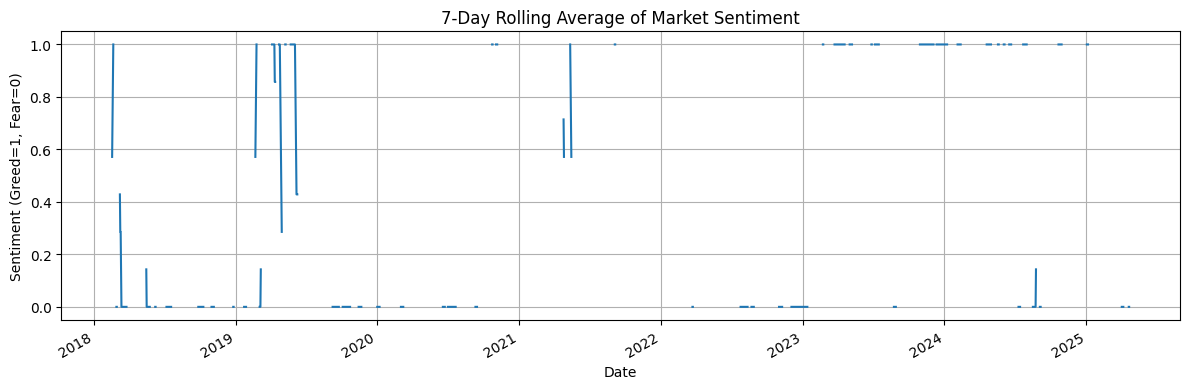

In [ ]:
# Plot sentiment over time
plt.figure(figsize=(12, 4))
df.set_index('date')['Sentiment'].rolling(7).mean().plot()
plt.title('7-Day Rolling Average of Market Sentiment')
plt.ylabel('Sentiment (Greed=1, Fear=0)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

📈 Market Strategy Suggestions

1.Greed Rising (Curve Trends Upward Toward 1):
Risk-On Phase: Traders are confident.

Strategy:

Go long on breakout setups.

Consider higher leverage positions (with stops).

Use trailing stop-loss to capture extended gains.



2.Fear Rising (Curve Falls Toward 0):
Risk-Off Phase: Market shows uncertainty.

Strategy:

Avoid overleveraging.

Use tight stop-losses.

Consider short positions on weak assets.


3.Sudden Sentiment Reversals (Sharp drops or spikes):
Signals volatility ahead.

Strategy:

Reduce trade size or hedge.

Prepare for mean reversion or whipsaw movements.

Use sentiment crossovers with technical indicators (like RSI or MACD) for entry/exit confirmation.

/tmp/ipython-input-20-3641565365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='classification', palette='Set2')


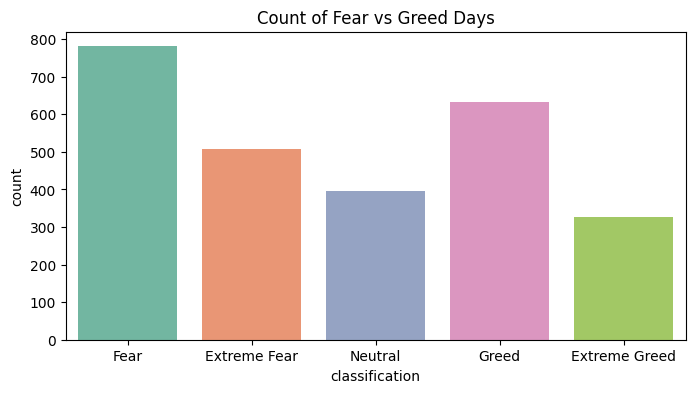

In [ ]:
# Daily Sentiment Counts
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='classification', palette='Set2')
plt.title('Count of Fear vs Greed Days')
plt.show()

#📊 Interpreting the Plot:

##If "Greed" Days Dominate:

Market is often optimistic, potentially overbought.

Strategy:

Take profits regularly; avoid overleveraging.

Watch for reversal signals using indicators like RSI (Relative Strength Index) or Bollinger Bands.


##If "Fear" Days Dominate:

Market sentiment is bearish or cautious.

Strategy:

Look for buy-the-dip opportunities in strong assets.

Use limit orders to enter at undervalued prices.

Avoid breakout trades; favor range trading or short positions on weak assets.

##If Counts Are Balanced:

Volatility likely cycles — market could be range-bound or in transition.

Strategy:

Use sentiment + trend confirmation (e.g., MACD, moving average crossover).

Trade smaller, adapt positions quickly.

In [ ]:
# Optional: Export cleaned file
df.to_csv('cleaned_bitcoin_sentiment.csv', index=False)

In [ ]:
print(df.to_csv)

<bound method NDFrame.to_csv of        timestamp  value classification       date  Sentiment
0     1517463000     30           Fear 2018-02-01        0.0
1     1517549400     15   Extreme Fear 2018-02-02        NaN
2     1517635800     40           Fear 2018-02-03        0.0
3     1517722200     24   Extreme Fear 2018-02-04        NaN
4     1517808600     11   Extreme Fear 2018-02-05        NaN
...          ...    ...            ...        ...        ...
2639  1745818200     54        Neutral 2025-04-28        NaN
2640  1745904600     60          Greed 2025-04-29        1.0
2641  1745991000     56          Greed 2025-04-30        1.0
2642  1746077400     53        Neutral 2025-05-01        NaN
2643  1746163800     67          Greed 2025-05-02        1.0

[2644 rows x 5 columns]>


In [4]:
df_trader =pd.read_csv('/content/historical_data.csv')

In [5]:
# Preview Data
print("\n📌 First 5 Rows:")
print(df_trader.head())


📌 First 5 Rows:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0     

In [11]:
df_sentiment = pd.read_csv('/content/fear_greed_index.csv')
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'], format='%Y-%m-%d').dt.date

In [14]:
# This line is not needed as the date has already been extracted in a previous cell.
# df_sentiment['date'] = df_sentiment['date'].dt.date

In [15]:
# Clean and Merge
df_trader['date'] = pd.to_datetime(df_trader['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
# This line is not needed as the date has already been extracted in a previous cell.
# df_sentiment['date'] = df_sentiment['date'].dt.date
df = pd.merge(df_trader, df_sentiment[['date', 'classification']], on='date', how='left')
df.rename(columns={'classification': 'market_sentiment'}, inplace=True)
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,market_sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


/tmp/ipython-input-16-180490303.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_clean, x='market_sentiment', y='Closed PnL', ci=None)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


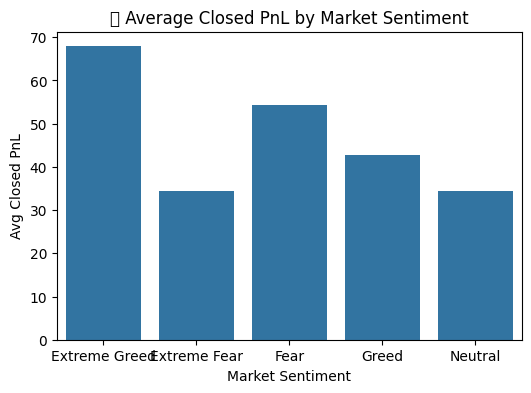

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Closed PnL' column is numeric
df['Closed PnL'] = pd.to_numeric(df['Closed PnL'], errors='coerce')

# Drop NaNs if any appeared during conversion
df_clean = df.dropna(subset=['Closed PnL', 'market_sentiment'])

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=df_clean, x='market_sentiment', y='Closed PnL', ci=None)
plt.title('📊 Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Avg Closed PnL')
plt.show()


🧠 Based on above plot:

1.Higher Avg PnL During Greed
Market is trending — traders ride momentum.

Strategy:

Use trend-following strategies: e.g., moving average crossover.

Allow winners to run (trailing stop-loss).

Slightly higher risk positions may pay off.


2.Higher Avg PnL During Fear
Smart traders exploit market overreactions.

Strategy:

Contrarian entries — buy strong assets on dips.

Use oversold indicators (RSI < 30).

Reduce leverage but increase frequency of small entries.

3.Low/Negative Avg PnL During Fear
Market punishes trades; volatility, stop-outs common.

Strategy:

Trade less; prioritize capital preservation.

Avoid entering impulsive trades.

Consider shorting weak coins only with confirmations.

 ## 📊  Exploratory Analysis

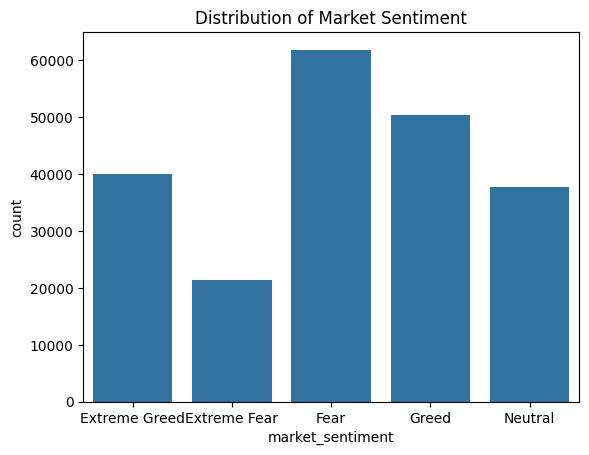

In [17]:
# Distribution of market sentiment
sns.countplot(data=df, x='market_sentiment')
plt.title("Distribution of Market Sentiment")
plt.show()

In [22]:
## 🧠  Define Winning Trades

df['is_win'] = df['Closed PnL'] > 0


In [23]:
# Win rate by sentiment
print(df.groupby('market_sentiment')['is_win'].mean())

market_sentiment
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: is_win, dtype: float64


In [25]:
## 🔄 Correlation Analysis
# Optional: check numeric correlations
df[['Closed PnL', 'Start Position']].corr()


,Closed PnL,Start Position
Closed PnL,1.000000,0.004066
Start Position,0.004066,1.000000


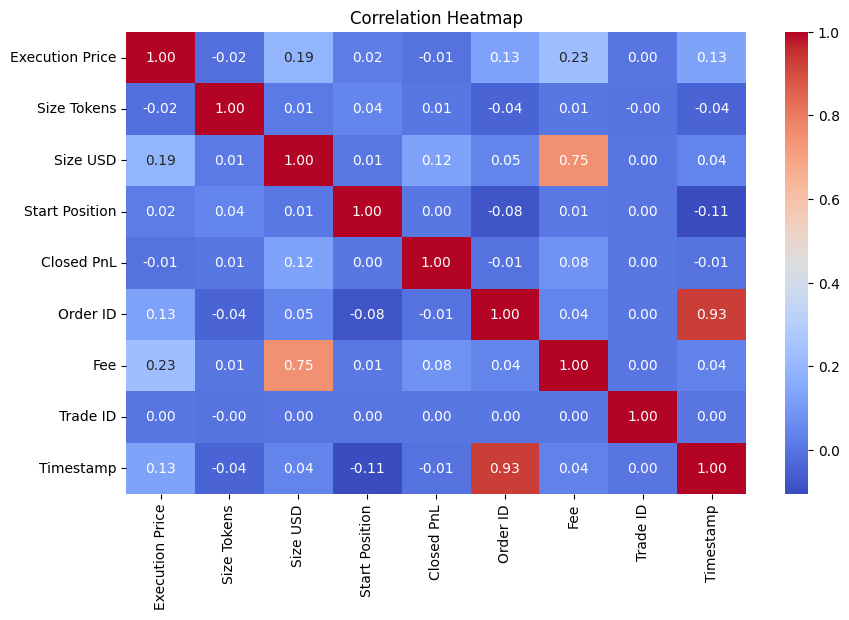

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


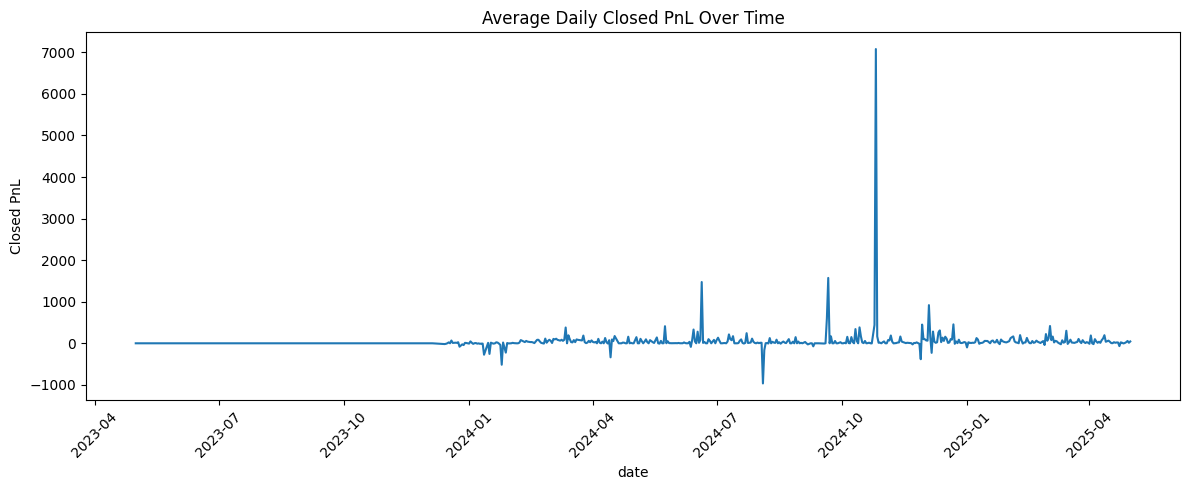

In [27]:
# Daily average PnL trend
trend = df.groupby('date')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='Closed PnL', data=trend)
plt.title("Average Daily Closed PnL Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


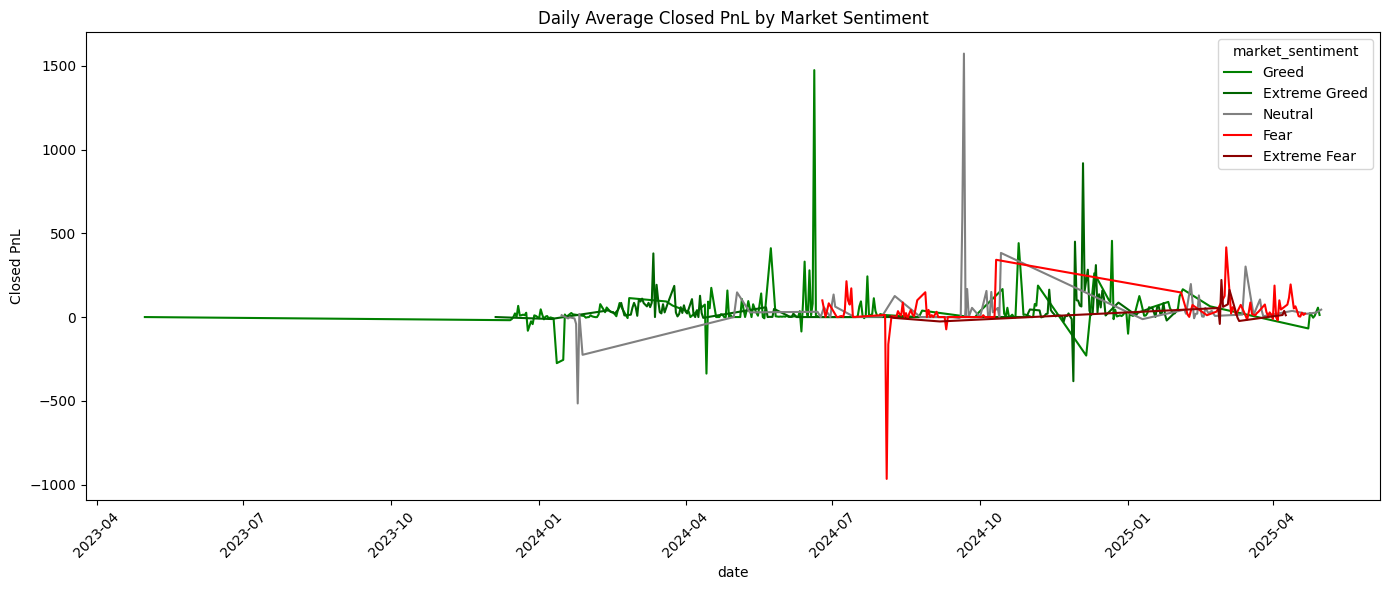

In [29]:
# Merge sentiment into the trend data
trend_with_sentiment = pd.merge(trend, df[['date', 'market_sentiment']].drop_duplicates(), on='date', how='left')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_with_sentiment, x='date', y='Closed PnL', hue='market_sentiment', palette={'Fear': 'red', 'Greed': 'green', 'Extreme Fear': 'darkred', 'Extreme Greed': 'darkgreen', 'Neutral': 'gray'})
plt.title("Daily Average Closed PnL by Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This version adds sentiment color context to your time-series plot, helping you visually detect if PnL tends to rise during "Greed" or fall during "Fear".

📊 Observations You Might See:

✅ Greed or Extreme Greed:

If the Closed PnL rises during these days → Momentum-based strategies likely perform better.

Strategy: Follow the trend, use breakout setups, and ride strong moves.


🚩 Fear or Extreme Fear:

If PnL tends to drop or show volatility, traders may be exiting early or overreacting.

Strategy: Use risk-off setups, scale down position sizes, or adopt mean-reversion strategies.


🟰 Neutral sentiment:

If PnL stabilizes, it could be a range-bound environment.

Strategy: Consider range trading or wait for sentiment shifts before entering major positions.

💡 Strategy Takeaways:

Sentiment-aware filters: Only take high-risk trades during Greed, and shift to conservative tactics during Fear.

PnL profiling: Monitor your own PnL breakdown by sentiment and refine your entry/exit timing.